In [25]:
import pandas as pd
import numpy as np

# 이상치 제거

btb_df = pd.read_csv('BtoB_리스트.csv', encoding='cp949')
btb_df2 = pd.read_csv('./BtoB_member.csv', encoding='cp949')
btb_df3 = pd.read_csv('./회원_BTB.csv', encoding='cp949')
btb_df4 = pd.read_csv('./회원_이상치.csv', encoding='cp949')


btb_li = [btb_df,btb_df2,btb_df3,btb_df4]



In [26]:
from functools import reduce

btb_all = reduce(lambda x,y: pd.merge(x,y,on='CUSTNO',how='outer'),btb_li)
cust_li=btb_all['CUSTNO']

In [27]:
cust_li

0           7
1           9
2          11
3          17
4          22
        ...  
1043    12871
1044     9724
1045    17676
1046     3566
1047     4095
Name: CUSTNO, Length: 1048, dtype: int64

In [118]:
import pandas as pd

all_df = pd.read_csv('고객속성df.csv', index_col=0)

all_df.head()
len(all_df)

19383

In [119]:
# for i in list(cust_li.values):
#     all_df.drop(all_df[all_df['CUSTNO']==i].index, inplace=True)
# all_df  

In [120]:
all_df.head()

,CUSTNO,GENDER,AGE,14_1cus_level,14_2cus_level,15_1cus_level,15_2cus_level,member_sales,use_ch_level
0,1,0,6,4.00,5.00,4.00,4.00,0.00,1.00
1,2,0,6,4.00,4.00,5.00,5.00,0.00,1.00
2,3,0,6,1.00,1.00,1.00,1.00,0.00,1.00
3,4,1,6,3.00,3.00,2.00,2.00,0.00,1.00
4,5,0,6,2.00,2.00,3.00,3.00,0.00,1.00


In [121]:
# corr_df=all_df[['CUSTNO', '14_1cus_level', '14_2cus_level','15_1cus_level']]
# corr_df=all_df[['CUSTNO', '14_1cus_level', '14_2cus_level','15_1cus_level','15_2cus_level']]
corr_df=all_df[['CUSTNO', '14_1cus_level', '14_2cus_level']]

## 1-2분기 평균 값 구하기

In [122]:
import warnings
warnings.filterwarnings('ignore')

corr_df2 = corr_df.drop(['CUSTNO'], axis=1, inplace = False)
corr_df['sum_a'] = corr_df2.sum(axis=1)
corr_df.head()

,CUSTNO,14_1cus_level,14_2cus_level,sum_a
0,1,4.00,5.00,9.00
1,2,4.00,4.00,8.00
2,3,1.00,1.00,2.00
3,4,3.00,3.00,6.00
4,5,2.00,2.00,4.00


In [123]:
# 롯데 총 매출량 증감 적용
# 2014-1~2014-2 : 0.082 상승
# 2014-2~2015-1 : -0.012 하락
# 2015-1~2015-2 : 0.052 상승
import pandas as pd
rate_df = pd.read_csv('rate_df.csv', index_col=0)
rate_df.drop(['rate_sum','rate_grade_3','rate_grade_2'], axis=1, inplace=True)
rate_df.head()

,CUSTNO,rate_grade_1
0,1,1
1,2,-1
2,3,1
3,4,-1
4,5,-1


In [124]:
corr_df['sum_a']=corr_df['sum_a']+rate_df['rate_grade_1']
corr_df.head()

,CUSTNO,14_1cus_level,14_2cus_level,sum_a
0,1,4.00,5.00,10.00
1,2,4.00,4.00,7.00
2,3,1.00,1.00,3.00
3,4,3.00,3.00,5.00
4,5,2.00,2.00,3.00


In [125]:
corr_df['sum_a'].describe()

count   19383.00
mean        5.15
std         2.66
min         1.00
25%         3.00
50%         5.00
75%         7.00
max        11.00
Name: sum_a, dtype: float64

In [126]:
corr_df['cus_level'] = 2
corr_df.loc[corr_df['sum_a'] <= 3, 'cus_level'] = 1
corr_df.loc[corr_df['sum_a'] > 5, 'cus_level'] = 3
corr_df.loc[corr_df['sum_a'] > 7, 'cus_level'] = 4

In [127]:
corr_df['sub_avg']=corr_df['14_2cus_level'] - corr_df['14_1cus_level']

In [128]:
corr_df

,CUSTNO,14_1cus_level,14_2cus_level,sum_a,cus_level,sub_avg
0,1,4.00,5.00,10.00,4,1.00
1,2,4.00,4.00,7.00,3,0.00
2,3,1.00,1.00,3.00,1,0.00
3,4,3.00,3.00,5.00,2,0.00
4,5,2.00,2.00,3.00,1,0.00
...,...,...,...,...,...,...
19378,19379,1.00,2.00,3.00,1,1.00
19379,19380,1.00,3.00,4.00,2,2.00
19380,19381,1.00,1.00,2.00,1,0.00
19381,19382,1.00,1.00,2.00,1,0.00


In [129]:
corr_df.loc[(corr_df['sub_avg']<=0)&corr_df['cus_level'] == 1, 'avg_grade'] = 1
corr_df.loc[(corr_df['sub_avg']<=0)&(corr_df['cus_level'] >=2), 'avg_grade'] = 2
corr_df.loc[(corr_df['sub_avg']<=0)&(corr_df['cus_level'] == 4), 'avg_grade'] = 3
corr_df.loc[(corr_df['sub_avg']>0)&(corr_df['cus_level'] == 1), 'avg_grade'] = 4
corr_df.loc[(corr_df['sub_avg']>0)&(corr_df['cus_level'] >=2), 'avg_grade'] = 5
corr_df.loc[(corr_df['sub_avg']>0)&(corr_df['cus_level'] == 4), 'avg_grade'] = 6

In [130]:
avg_grade=corr_df[['CUSTNO','avg_grade']]

In [133]:
pur_df = pd.read_csv('pur_level2.csv', index_col=0)
pur_df=pur_df.round(0)
pur_df

,CUSTNO,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,가전_avg,의류_avg,신선_avg,의약품_avg,사치품_avg
0,1,2.00,4.00,3.00,3.00,2.00,0.00,1.00,3.00,3.00,3.00,0.00,3.00
1,2,2.00,3.00,3.00,5.00,1.00,0.00,0.00,4.00,3.00,3.00,0.00,3.00
2,3,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00
3,4,2.00,2.00,2.00,4.00,1.00,0.00,0.00,0.00,3.00,3.00,1.00,0.00
4,5,2.00,2.00,3.00,2.00,1.00,0.00,0.00,1.00,3.00,3.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1.00,0.00,1.00,0.00,2.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
19379,19380,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
19380,19381,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
19381,19382,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [134]:
semi_df12 = pd.merge(avg_grade,pur_df, on='CUSTNO',how='outer')
semi_df12

,CUSTNO,avg_grade,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,가전_avg,의류_avg,신선_avg,의약품_avg,사치품_avg
0,1,6.00,2.00,4.00,3.00,3.00,2.00,0.00,1.00,3.00,3.00,3.00,0.00,3.00
1,2,2.00,2.00,3.00,3.00,5.00,1.00,0.00,0.00,4.00,3.00,3.00,0.00,3.00
2,3,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00
3,4,2.00,2.00,2.00,2.00,4.00,1.00,0.00,0.00,0.00,3.00,3.00,1.00,0.00
4,5,1.00,2.00,2.00,3.00,2.00,1.00,0.00,0.00,1.00,3.00,3.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,4.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00
19379,19380,5.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
19380,19381,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
19381,19382,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [135]:
semi_df12.isnull().sum()

CUSTNO       0
avg_grade    0
가공_avg       0
가구/인테_avg    0
일상_avg       0
스포츠_avg      0
패션잡화_avg     0
교육/문화_avg    0
기타_avg       0
가전_avg       0
의류_avg       0
신선_avg       0
의약품_avg      0
사치품_avg      0
dtype: int64

In [136]:
pro_fav_df = pd.read_csv('pro_fav_df12.csv', index_col=0)
pro_fav_df

,CUSTNO,food_grade,fun_grade,etc_grade,fresh_grade,fashion_grade,necce_grade,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade
0,1,3.00,6.00,5.00,5.00,6.00,6.00,3.00,3.00,6.00,0.00,5.00,0.00
1,2,3.00,3.00,0.00,3.00,6.00,3.00,3.00,3.00,3.00,0.00,5.00,0.00
2,3,4.00,0.00,0.00,4.00,1.00,4.00,0.00,0.00,4.00,4.00,0.00,0.00
3,4,2.00,5.00,0.00,2.00,2.00,5.00,5.00,2.00,0.00,4.00,0.00,0.00
4,5,3.00,5.00,0.00,2.00,2.00,2.00,5.00,2.00,2.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,11195,0.00,0.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00
19334,4825,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
19335,18894,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
19336,1330,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00


In [137]:
final_1 = pd.merge(semi_df12,pro_fav_df,on='CUSTNO', how='outer')

In [138]:
fre12 = pd.read_csv('./frequency12.csv',index_col=0)

final_1 = pd.merge(final_1,fre12, on='CUSTNO', how='outer')
final_1

,CUSTNO,avg_grade,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,가전_avg,...,fresh_grade,fashion_grade,necce_grade,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade,fre_grade
0,1,6.00,2.00,4.00,3.00,3.00,2.00,0.00,1.00,3.00,...,5.00,6.00,6.00,3.00,3.00,6.00,0.00,5.00,0.00,6.00
1,2,2.00,2.00,3.00,3.00,5.00,1.00,0.00,0.00,4.00,...,3.00,6.00,3.00,3.00,3.00,3.00,0.00,5.00,0.00,3.00
2,3,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,...,4.00,1.00,4.00,0.00,0.00,4.00,4.00,0.00,0.00,5.00
3,4,2.00,2.00,2.00,2.00,4.00,1.00,0.00,0.00,0.00,...,2.00,2.00,5.00,5.00,2.00,0.00,4.00,0.00,0.00,2.00
4,5,1.00,2.00,2.00,3.00,2.00,1.00,0.00,0.00,1.00,...,2.00,2.00,2.00,5.00,2.00,2.00,0.00,1.00,0.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,4.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,1.00,...,0.00,0.00,5.00,0.00,5.00,0.00,0.00,0.00,5.00,4.00
19379,19380,5.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,0.00,0.00,4.00,0.00,4.00,0.00,0.00,0.00,0.00,4.00
19380,19381,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
19381,19382,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00


In [139]:
target = pd.read_csv('타겟1-2분기용.csv',index_col=0)
target

,CUSTNO,target_grade
0,1,0.00
1,2,1.00
2,3,0.00
3,4,0.00
4,5,0.00
...,...,...
19378,19379,1.00
19379,19380,1.00
19380,19381,1.00
19381,19382,1.00


In [140]:
final_1 = pd.merge(final_1,target, on='CUSTNO', how='outer')


In [141]:
final_1

,CUSTNO,avg_grade,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,가전_avg,...,fashion_grade,necce_grade,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade,fre_grade,target_grade
0,1,6.00,2.00,4.00,3.00,3.00,2.00,0.00,1.00,3.00,...,6.00,6.00,3.00,3.00,6.00,0.00,5.00,0.00,6.00,0.00
1,2,2.00,2.00,3.00,3.00,5.00,1.00,0.00,0.00,4.00,...,6.00,3.00,3.00,3.00,3.00,0.00,5.00,0.00,3.00,1.00
2,3,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,...,1.00,4.00,0.00,0.00,4.00,4.00,0.00,0.00,5.00,0.00
3,4,2.00,2.00,2.00,2.00,4.00,1.00,0.00,0.00,0.00,...,2.00,5.00,5.00,2.00,0.00,4.00,0.00,0.00,2.00,0.00
4,5,1.00,2.00,2.00,3.00,2.00,1.00,0.00,0.00,1.00,...,2.00,2.00,5.00,2.00,2.00,0.00,1.00,0.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,4.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,1.00,...,0.00,5.00,0.00,5.00,0.00,0.00,0.00,5.00,4.00,1.00
19379,19380,5.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,0.00,4.00,0.00,4.00,0.00,0.00,0.00,0.00,4.00,1.00
19380,19381,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00
19381,19382,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00


In [143]:
final_1 = pd.merge(final_1,pur_13, on='CUSTNO', how='outer')

In [145]:
final_1.fillna(0,inplace=True)

In [146]:
final_1

,CUSTNO,avg_grade,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,가전_avg,...,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade,fre_grade,target_grade,GENDER,AGE
0,1,6.00,2.00,4.00,3.00,3.00,2.00,0.00,1.00,3.00,...,3.00,3.00,6.00,0.00,5.00,0.00,6.00,0.00,0,6
1,2,2.00,2.00,3.00,3.00,5.00,1.00,0.00,0.00,4.00,...,3.00,3.00,3.00,0.00,5.00,0.00,3.00,1.00,0,6
2,3,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,4.00,4.00,0.00,0.00,5.00,0.00,0,6
3,4,2.00,2.00,2.00,2.00,4.00,1.00,0.00,0.00,0.00,...,5.00,2.00,0.00,4.00,0.00,0.00,2.00,0.00,1,6
4,5,1.00,2.00,2.00,3.00,2.00,1.00,0.00,0.00,1.00,...,5.00,2.00,2.00,0.00,1.00,0.00,2.00,0.00,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,4.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,1.00,...,0.00,5.00,0.00,0.00,0.00,5.00,4.00,1.00,1,2
19379,19380,5.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,0.00,4.00,0.00,0.00,0.00,0.00,4.00,1.00,1,2
19380,19381,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1,4
19381,19382,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1,4


In [90]:
final_1.to_csv('final_df12_new5.csv')

In [83]:
pur_13 = pd.read_csv('pur_final5.csv', index_col=0)
pur_13=pur_13[['CUSTNO','GENDER','AGE']]

In [84]:
pur_13

,CUSTNO,GENDER,AGE
0,1,0,6
1,2,0,6
2,3,0,6
3,4,1,6
4,5,0,6
...,...,...,...
19378,19379,1,2
19379,19380,1,2
19380,19381,1,4
19381,19382,1,4


In [157]:
sub_12 = pd.read_csv('12분기차액.csv')

sub_12['sub12']=sub_12['총액.1']-sub_12['총액']
sub_12.drop('차액',axis=1, inplace=True)

In [158]:
sub_12.sort_values('CUSTNO')

sub_12['sum_12'] = sub_12['총액.1'] + sub_12['총액']

In [159]:
sub_12

,CUSTNO,총액,총액.1,sub12,sum_12
0,11227,3450.00,129200.00,125750.00,132650.00
1,17159,5000.00,3516890.00,3511890.00,3521890.00
2,12881,5250.00,0.00,-5250.00,5250.00
3,18369,5950.00,105320.00,99370.00,111270.00
4,15302,6190.00,2241431.00,2235241.00,2247621.00
...,...,...,...,...,...
19333,19372,0.00,9893187.00,9893187.00,9893187.00
19334,16642,0.00,10594340.00,10594340.00,10594340.00
19335,16005,0.00,17395250.00,17395250.00,17395250.00
19336,15674,0.00,45985170.00,45985170.00,45985170.00


In [160]:

sm = int(sub_12['sum_12'].describe()[4])
big = int(sub_12['sum_12'].describe()[6])
sub_12.loc[(sub_12['sum_12'] < sm)&(sub_12['sub12'] <= 0), 'grade']=1
sub_12.loc[(sub_12['sum_12'] >=  sm)&(sub_12['sub12'] <= 0), 'grade']=2
sub_12.loc[(sub_12['sum_12'] >big)&(sub_12['sub12'] <= 0), 'grade']=3
sub_12.loc[(sub_12['sum_12'] < sm)&(sub_12['sub12'] > 0), 'grade']=4
sub_12.loc[(sub_12['sum_12'] >= sm)&(sub_12['sub12'] > 0), 'grade']=5
sub_12.loc[(sub_12['sum_12'] >big)&(sub_12['sub12'] > 0), 'grade']=6

In [162]:
sub_12=sub_12[['CUSTNO','grade']]

In [164]:
sub_12.sort_values('CUSTNO')

,CUSTNO,grade
17477,1,6.00
17985,2,3.00
689,3,4.00
11459,4,2.00
11995,5,2.00
...,...,...
19233,19376,4.00
19228,19377,4.00
19247,19378,4.00
19279,19379,4.00


In [165]:
final_1 = pd.merge(final_1,sub_12, on='CUSTNO', how='outer')

In [167]:
final_1.fillna(0,inplace=True)

In [178]:
final_1.columns

Index(['CUSTNO', 'avg_grade', '가공_avg', '가구/인테_avg', '일상_avg', '스포츠_avg',
       '패션잡화_avg', '교육/문화_avg', '기타_avg', '가전_avg', '의류_avg', '신선_avg',
       '의약품_avg', '사치품_avg', 'food_grade', 'fun_grade', 'etc_grade',
       'fresh_grade', 'fashion_grade', 'necce_grade', 'sport_grade',
       'stuff_grade', 'digital_grade', 'edu_grade', 'high_grade', 'medi_grade',
       'fre_grade', 'target_grade', 'GENDER', 'AGE', 'grade'],
      dtype='object')

In [174]:
final_1.to_csv('찐최종1-2분기프레임.csv')

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred, pred_proba):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [172]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear')
# lr_clf.fit(x_train,y_train)
# lr_pred = lr_clf.predict(x_test)
#1-2분기 학습
x_features = final_1.drop(['CUSTNO','target_grade','avg_grade'], axis=1, inplace=False)
y_target = final_1['target_grade']
#1-3분기 학습
x_features_3 = df2.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
target4_t = df2['target_grade']
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=156)

# lr_clf.fit(x_features,y_target)
# pred = lr_clf.predict(x_features_3)
# pred_proba = lr_clf.predict_proba(x_features_3)[:,1]

# get_clf_eval(target4_t, pred, pred_proba)

lr_clf.fit(x_train,y_train)
pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[1862  996]
 [ 777 2180]]
정확도: 0.6951, 정밀도: 0.6864, 재현율: 0.7372,    F1: 0.7109, AUC:0.7045


In [173]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor


# x_features = all_13_3.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# # x_features = all_13_3.drop(['CUSTNO','target_grade','digital_grade','GENDER','GBTIME','의류_avg','의약품_avg','가공_avg'], axis=1, inplace=False)
# y_target = all_13_3['target_grade']
# target4_t = target4['target_grade']

x_features = final_1.drop(['CUSTNO','target_grade','avg_grade'], axis=1, inplace=False)
y_target = final_1['target_grade']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.2, random_state=156)
# #1-2분기 학습
# x_features = df1.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# y_target = df1['target_grade']
# #1-3분기 학습
# x_features_3 = df2.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# target4_t = df2['target_grade']


clf = LazyClassifier(verbose=0, predictions=True)
# clf2 = LazyRegressor(verbose=0, predictions=True)

# models, predictions = clf2.fit(x_train, x_test, y_train, y_test)
models, predictions = clf.fit(x_train, x_test,y_train ,y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:49<00:00,  3.77s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.73,0.73,0.73,0.73,0.31
AdaBoostClassifier,0.72,0.72,0.72,0.72,0.77
XGBClassifier,0.72,0.72,0.72,0.72,0.76
RandomForestClassifier,0.72,0.72,0.72,0.72,1.94
ExtraTreesClassifier,0.72,0.72,0.72,0.72,2.06
SVC,0.71,0.71,0.71,0.71,19.25
RidgeClassifier,0.70,0.70,0.70,0.70,0.05
LinearDiscriminantAnalysis,0.70,0.70,0.70,0.70,0.11
LinearSVC,0.70,0.70,0.70,0.70,2.57


## 최종 데이터프레임(1-2)

In [91]:
all_12 = pd.read_csv('찐최종1-2분기프레임.csv',index_col=0)
all_12.head()

,CUSTNO,avg_grade,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,가전_avg,...,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade,fre_grade,target_grade,GENDER,AGE,grade
0,1,6.00,2.00,4.00,3.00,3.00,2.00,0.00,1.00,3.00,...,3.00,6.00,0.00,5.00,0.00,6.00,0.00,0,6,6.00
1,2,2.00,2.00,3.00,3.00,5.00,1.00,0.00,0.00,4.00,...,3.00,3.00,0.00,5.00,0.00,3.00,1.00,0,6,3.00
2,3,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,...,0.00,4.00,4.00,0.00,0.00,5.00,0.00,0,6,4.00
3,4,2.00,2.00,2.00,2.00,4.00,1.00,0.00,0.00,0.00,...,2.00,0.00,4.00,0.00,0.00,2.00,0.00,1,6,2.00
4,5,1.00,2.00,2.00,3.00,2.00,1.00,0.00,0.00,1.00,...,2.00,2.00,0.00,1.00,0.00,2.00,0.00,0,6,2.00


In [92]:
# for i in list(cust_li.values):
#     all_12.drop(all_12[all_12['CUSTNO']==i].index, inplace=True)
# all_12  

In [93]:
import pandas as pd

rest12 = pd.read_csv('./cu_rest12.csv', index_col=0)
rest12 = rest12[['CUSTNO','rest']]
rest12

,CUSTNO,rest
0,1,3.00
1,2,2.00
2,3,3.00
3,4,3.00
4,5,2.00
...,...,...
19333,19376,3.00
19334,19377,3.00
19335,19378,3.00
19336,19379,3.00


In [94]:
all_12 = pd.merge(all_12,rest12, on='CUSTNO',how='outer')
all_12

,CUSTNO,avg_grade,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,가전_avg,...,digital_grade,edu_grade,high_grade,medi_grade,fre_grade,target_grade,GENDER,AGE,grade,rest
0,1,6.00,2.00,4.00,3.00,3.00,2.00,0.00,1.00,3.00,...,6.00,0.00,5.00,0.00,6.00,0.00,0,6,6.00,3.00
1,2,2.00,2.00,3.00,3.00,5.00,1.00,0.00,0.00,4.00,...,3.00,0.00,5.00,0.00,3.00,1.00,0,6,3.00,2.00
2,3,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,...,4.00,4.00,0.00,0.00,5.00,0.00,0,6,4.00,3.00
3,4,2.00,2.00,2.00,2.00,4.00,1.00,0.00,0.00,0.00,...,0.00,4.00,0.00,0.00,2.00,0.00,1,6,2.00,3.00
4,5,1.00,2.00,2.00,3.00,2.00,1.00,0.00,0.00,1.00,...,2.00,0.00,1.00,0.00,2.00,0.00,0,6,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,4.00,1.00,0.00,1.00,0.00,2.00,0.00,0.00,1.00,...,0.00,0.00,0.00,5.00,4.00,1.00,1,2,4.00,3.00
19379,19380,5.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,4.00,1.00,1,2,4.00,3.00
19380,19381,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.00,1,4,0.00,NaN
19381,19382,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,1.00,1,4,0.00,NaN


In [95]:
all_12.dropna(inplace=True)

In [111]:
all_12.to_csv('찐찐최종1-2.csv')

## 최종데이터프레임(1-3)

In [96]:
all_13_4 = pd.read_csv('찐최종_1_4.csv',index_col=0)
all_13_4.head()

,CUSTNO,GENDER,AGE,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,...,necce_grade,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade,fre_grade,target_grade,grade
0,1,0,6,4.00,8.00,7.00,5.00,3.00,0.00,3.00,...,3.00,3.00,3.00,6.00,4.00,5.00,0.00,6.00,0.00,3.00
1,2,0,6,4.00,7.00,7.00,9.00,1.00,0.00,0.00,...,6.00,3.00,3.00,6.00,0.00,5.00,0.00,3.00,0.00,6.00
2,3,0,6,1.00,0.00,2.00,0.00,0.00,1.00,0.00,...,4.00,0.00,0.00,1.00,4.00,0.00,0.00,2.00,0.00,1.00
3,4,1,6,4.00,4.00,4.00,6.00,1.00,0.00,0.00,...,5.00,2.00,2.00,0.00,1.00,0.00,5.00,2.00,0.00,2.00
4,5,0,6,4.00,4.00,7.00,3.00,2.00,0.00,0.00,...,2.00,1.00,2.00,2.00,0.00,1.00,0.00,2.00,0.00,2.00


In [97]:
rest13 = pd.read_csv('./cu_rest13.csv', index_col=0)
rest13 = rest13[['CUSTNO','rest']]
rest13

,CUSTNO,rest
0,1,2.00
1,2,2.00
2,3,3.00
3,4,3.00
4,5,2.00
...,...,...
19367,19379,3.00
19368,19380,3.00
19369,19381,2.00
19370,19382,3.00


In [98]:
all_13_4 = pd.merge(all_13_4,rest13, on='CUSTNO',how='outer')
all_13_4

,CUSTNO,GENDER,AGE,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,...,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade,fre_grade,target_grade,grade,rest
0,1,0,6,4.00,8.00,7.00,5.00,3.00,0.00,3.00,...,3.00,3.00,6.00,4.00,5.00,0.00,6.00,0.00,3.00,2.00
1,2,0,6,4.00,7.00,7.00,9.00,1.00,0.00,0.00,...,3.00,3.00,6.00,0.00,5.00,0.00,3.00,0.00,6.00,2.00
2,3,0,6,1.00,0.00,2.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,4.00,0.00,0.00,2.00,0.00,1.00,3.00
3,4,1,6,4.00,4.00,4.00,6.00,1.00,0.00,0.00,...,2.00,2.00,0.00,1.00,0.00,5.00,2.00,0.00,2.00,3.00
4,5,0,6,4.00,4.00,7.00,3.00,2.00,0.00,0.00,...,1.00,2.00,2.00,0.00,1.00,0.00,2.00,0.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,1,2,1.00,0.00,3.00,0.00,3.00,0.00,0.00,...,0.00,5.00,4.00,0.00,0.00,5.00,4.00,1.00,4.00,3.00
19379,19380,1,2,1.00,0.00,3.00,0.00,1.00,0.00,0.00,...,0.00,4.00,4.00,0.00,0.00,4.00,4.00,1.00,4.00,3.00
19380,19381,1,4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,4.00,4.00,0.00,4.00,0.00,4.00,4.00,1.00,4.00,2.00
19381,19382,1,4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,4.00,4.00,0.00,4.00,0.00,4.00,4.00,1.00,4.00,3.00


In [121]:
all_13_4['패션잡화_avg'].unique()

array([3., 1., 0., 2., 5., 4., 6., 7., 8.])

In [99]:
all_13_4.dropna(inplace=True)

In [112]:
all_13_4.to_csv('찐찐최종1-4.csv')

In [122]:
all_13 = pd.read_csv('찐찐최종1-4.csv')
all_13

,Unnamed: 0,CUSTNO,GENDER,AGE,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,...,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade,fre_grade,target_grade,grade,rest
0,0,1,0,6,4.00,8.00,7.00,5.00,3.00,0.00,...,3.00,3.00,6.00,4.00,5.00,0.00,6.00,0.00,3.00,2.00
1,1,2,0,6,4.00,7.00,7.00,9.00,1.00,0.00,...,3.00,3.00,6.00,0.00,5.00,0.00,3.00,0.00,6.00,2.00
2,2,3,0,6,1.00,0.00,2.00,0.00,0.00,1.00,...,0.00,0.00,1.00,4.00,0.00,0.00,2.00,0.00,1.00,3.00
3,3,4,1,6,4.00,4.00,4.00,6.00,1.00,0.00,...,2.00,2.00,0.00,1.00,0.00,5.00,2.00,0.00,2.00,3.00
4,4,5,0,6,4.00,4.00,7.00,3.00,2.00,0.00,...,1.00,2.00,2.00,0.00,1.00,0.00,2.00,0.00,2.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19378,19379,1,2,1.00,0.00,3.00,0.00,3.00,0.00,...,0.00,5.00,4.00,0.00,0.00,5.00,4.00,1.00,4.00,3.00
19341,19379,19380,1,2,1.00,0.00,3.00,0.00,1.00,0.00,...,0.00,4.00,4.00,0.00,0.00,4.00,4.00,1.00,4.00,3.00
19342,19380,19381,1,4,0.00,1.00,0.00,0.00,0.00,0.00,...,4.00,4.00,0.00,4.00,0.00,4.00,4.00,1.00,4.00,2.00
19343,19381,19382,1,4,0.00,0.00,1.00,0.00,0.00,0.00,...,4.00,4.00,0.00,4.00,0.00,4.00,4.00,1.00,4.00,3.00


In [113]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

x_features = all_12.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
y_target = all_12['target_grade']
x_features_3 = all_13_4.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
target4_t = all_13_4['target_grade']
# 위에서 만든 x_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
x_tr, x_val, y_tr, y_val = train_test_split(x_features, y_target, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.01)

#lightGBM도 XGBoost와 동일하게 조기 중단 수행 가능
evals = [(x_tr,y_tr),(x_val,y_val)]
lgbm_wrapper.fit(x_tr,y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals)
pred = lgbm_wrapper.predict(x_features_3)
pred_proba = lgbm_wrapper.predict_proba(x_features_3)[:,1]

get_clf_eval(target4_t, pred, pred_proba)


[1]	training's binary_logloss: 0.690362	valid_1's binary_logloss: 0.69188
[2]	training's binary_logloss: 0.687978	valid_1's binary_logloss: 0.689728
[3]	training's binary_logloss: 0.685638	valid_1's binary_logloss: 0.687622
[4]	training's binary_logloss: 0.683347	valid_1's binary_logloss: 0.685565
[5]	training's binary_logloss: 0.681123	valid_1's binary_logloss: 0.683577
[6]	training's binary_logloss: 0.678942	valid_1's binary_logloss: 0.681602
[7]	training's binary_logloss: 0.676778	valid_1's binary_logloss: 0.67967
[8]	training's binary_logloss: 0.674681	valid_1's binary_logloss: 0.677774
[9]	training's binary_logloss: 0.672598	valid_1's binary_logloss: 0.675892
[10]	training's binary_logloss: 0.670577	valid_1's binary_logloss: 0.674094
[11]	training's binary_logloss: 0.668595	valid_1's binary_logloss: 0.672325
[12]	training's binary_logloss: 0.666626	valid_1's binary_logloss: 0.67055
[13]	training's binary_logloss: 0.664719	valid_1's binary_logloss: 0.668848
[14]	training's binary_l

[112]	training's binary_logloss: 0.572823	valid_1's binary_logloss: 0.590995
[113]	training's binary_logloss: 0.572426	valid_1's binary_logloss: 0.590673
[114]	training's binary_logloss: 0.57202	valid_1's binary_logloss: 0.590394
[115]	training's binary_logloss: 0.571583	valid_1's binary_logloss: 0.590039
[116]	training's binary_logloss: 0.571201	valid_1's binary_logloss: 0.589742
[117]	training's binary_logloss: 0.570789	valid_1's binary_logloss: 0.589465
[118]	training's binary_logloss: 0.570403	valid_1's binary_logloss: 0.589236
[119]	training's binary_logloss: 0.570033	valid_1's binary_logloss: 0.588922
[120]	training's binary_logloss: 0.569638	valid_1's binary_logloss: 0.588661
[121]	training's binary_logloss: 0.569267	valid_1's binary_logloss: 0.588438
[122]	training's binary_logloss: 0.568865	valid_1's binary_logloss: 0.588119
[123]	training's binary_logloss: 0.568492	valid_1's binary_logloss: 0.587848
[124]	training's binary_logloss: 0.568134	valid_1's binary_logloss: 0.587563


[243]	training's binary_logloss: 0.541362	valid_1's binary_logloss: 0.573319
[244]	training's binary_logloss: 0.541213	valid_1's binary_logloss: 0.573251
[245]	training's binary_logloss: 0.541017	valid_1's binary_logloss: 0.573191
[246]	training's binary_logloss: 0.540852	valid_1's binary_logloss: 0.573118
[247]	training's binary_logloss: 0.540682	valid_1's binary_logloss: 0.573089
[248]	training's binary_logloss: 0.54049	valid_1's binary_logloss: 0.573027
[249]	training's binary_logloss: 0.540339	valid_1's binary_logloss: 0.57294
[250]	training's binary_logloss: 0.540188	valid_1's binary_logloss: 0.572902
[251]	training's binary_logloss: 0.540002	valid_1's binary_logloss: 0.572842
[252]	training's binary_logloss: 0.539805	valid_1's binary_logloss: 0.572701
[253]	training's binary_logloss: 0.539645	valid_1's binary_logloss: 0.572676
[254]	training's binary_logloss: 0.539452	valid_1's binary_logloss: 0.572534
[255]	training's binary_logloss: 0.539286	valid_1's binary_logloss: 0.572481
[

[350]	training's binary_logloss: 0.525183	valid_1's binary_logloss: 0.56718
[351]	training's binary_logloss: 0.525059	valid_1's binary_logloss: 0.567188
[352]	training's binary_logloss: 0.524926	valid_1's binary_logloss: 0.567115
[353]	training's binary_logloss: 0.524789	valid_1's binary_logloss: 0.567077
[354]	training's binary_logloss: 0.524674	valid_1's binary_logloss: 0.567054
[355]	training's binary_logloss: 0.524546	valid_1's binary_logloss: 0.566975
[356]	training's binary_logloss: 0.524424	valid_1's binary_logloss: 0.566999
[357]	training's binary_logloss: 0.524308	valid_1's binary_logloss: 0.56696
[358]	training's binary_logloss: 0.524157	valid_1's binary_logloss: 0.566896
[359]	training's binary_logloss: 0.524037	valid_1's binary_logloss: 0.566915
[360]	training's binary_logloss: 0.523918	valid_1's binary_logloss: 0.566871
[361]	training's binary_logloss: 0.523788	valid_1's binary_logloss: 0.566842
[362]	training's binary_logloss: 0.523677	valid_1's binary_logloss: 0.56682
[3

In [114]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#1-3분기 학습
# x_features = all_13_3.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# x_features = all_13_3.drop(['CUSTNO','target_grade','digital_grade','GENDER','GBTIME','의류_avg','의약품_avg','가공_avg'], axis=1, inplace=False)
# y_target = all_13_3['target_grade']

#1-2분기 학습
x_features = all_12.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
y_target = all_12['target_grade']
#1-3분기 학습
x_features_3 = all_13_4.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
target4_t = all_13_4['target_grade']
# 전체 데이터 중, 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
# x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.2, random_state=156)

# x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_features_3, target4_t, test_size = 0.2, random_state=156)
x_tr, x_val, y_tr, y_val = train_test_split(x_features, y_target, test_size=0.1, random_state=156)
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=150, n_jobs=-1, num_leaves=20, objective=None,
               random_state=216, reg_alpha=1e-07, reg_lambda=0.7, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#lightGBM도 XGBoost와 동일하게 조기 중단 수행 가능

evals = [(x_tr,y_tr),(x_val,y_val)]
lgbm_wrapper.fit(x_tr,y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals)
pred = lgbm_wrapper.predict(x_features_3)
pred_proba = lgbm_wrapper.predict_proba(x_features_3)[:,1]

get_clf_eval(target4_t, pred, pred_proba)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	training's binary_logloss: 0.690486	valid_1's binary_logloss: 0.691892
[2]	training's binary_logloss: 0.689023	valid_1's binary_logloss: 0.690533
[3]	training's binary_logloss: 0.68674	valid_1's binary_logloss: 0.688419
[4]	training's binary_logloss: 0.685272	valid_1's binary_logloss: 0.687023
[5]	training's binary_logloss: 0.684248	valid_1's binary_logloss: 0.686006
[6]	training's binary_logloss: 0.68229	valid_1's binary_logloss: 0.684147
[7]	training's binary_logloss: 0.680272	valid_1's binary_logloss: 0.682264
[8]	training's binary_logloss: 0.678306	valid_1's binary_logloss: 0.680464
[9]	training's binary_logloss: 0.676241	valid_1's bin

[116]	training's binary_logloss: 0.579651	valid_1's binary_logloss: 0.591408
[117]	training's binary_logloss: 0.579335	valid_1's binary_logloss: 0.59114
[118]	training's binary_logloss: 0.578868	valid_1's binary_logloss: 0.590769
[119]	training's binary_logloss: 0.578418	valid_1's binary_logloss: 0.590416
[120]	training's binary_logloss: 0.577974	valid_1's binary_logloss: 0.590086
[121]	training's binary_logloss: 0.577535	valid_1's binary_logloss: 0.589738
[122]	training's binary_logloss: 0.577249	valid_1's binary_logloss: 0.589546
[123]	training's binary_logloss: 0.576822	valid_1's binary_logloss: 0.589216
[124]	training's binary_logloss: 0.576407	valid_1's binary_logloss: 0.588897
[125]	training's binary_logloss: 0.576131	valid_1's binary_logloss: 0.588708
[126]	training's binary_logloss: 0.575762	valid_1's binary_logloss: 0.588439
[127]	training's binary_logloss: 0.575359	valid_1's binary_logloss: 0.588142
[128]	training's binary_logloss: 0.574962	valid_1's binary_logloss: 0.587854


In [123]:
all_13_4.columns

Index(['CUSTNO', 'GENDER', 'AGE', '가공_avg', '가구/인테_avg', '일상_avg', '스포츠_avg',
       '패션잡화_avg', '교육/문화_avg', '기타_avg', '가전_avg', '의류_avg', '신선_avg',
       '의약품_avg', '사치품_avg', 'avg_grade', 'food_grade', 'fun_grade',
       'etc_grade', 'fresh_grade', 'fashion_grade', 'necce_grade',
       'sport_grade', 'stuff_grade', 'digital_grade', 'edu_grade',
       'high_grade', 'medi_grade', 'fre_grade', 'target_grade', 'grade',
       'rest'],
      dtype='object')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

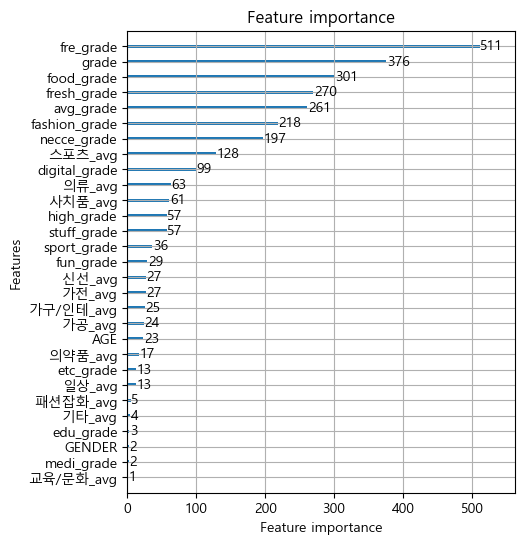

In [115]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

fig,ax = plt.subplots(figsize=(5,6))
plot_importance(lgbm_wrapper, ax=ax)

In [387]:
a = all_12[['CUSTNO','target_grade']]
df = all_13_4.drop('target_grade', axis=1)

df = pd.merge(df,a,on='CUSTNO',how='outer')
df
df.dropna(inplace=True)

In [333]:
df.isnull().sum()

CUSTNO            0
GENDER           21
AGE              21
가공_avg           21
가구/인테_avg        21
일상_avg           21
스포츠_avg          21
패션잡화_avg         21
교육/문화_avg        21
기타_avg           21
가전_avg           21
의류_avg           21
신선_avg           21
의약품_avg          21
사치품_avg          21
avg_grade        21
food_grade       21
fun_grade        21
etc_grade        21
fresh_grade      21
fashion_grade    21
necce_grade      21
sport_grade      21
stuff_grade      21
digital_grade    21
edu_grade        21
high_grade       21
medi_grade       21
fre_grade        21
grade            21
rest             21
target_grade     28
dtype: int64

In [334]:
df.dropna(inplace=True)

In [335]:
len(df)

19317

In [388]:
a = all_13_4[['CUSTNO','target_grade']]
df2 = df.drop('target_grade', axis=1)

df2 = pd.merge(df2,a,on='CUSTNO',how='outer')
df2
df2.dropna(inplace=True)

In [337]:
df2.isnull().sum()

CUSTNO            0
GENDER           28
AGE              28
가공_avg           28
가구/인테_avg        28
일상_avg           28
스포츠_avg          28
패션잡화_avg         28
교육/문화_avg        28
기타_avg           28
가전_avg           28
의류_avg           28
신선_avg           28
의약품_avg          28
사치품_avg          28
avg_grade        28
food_grade       28
fun_grade        28
etc_grade        28
fresh_grade      28
fashion_grade    28
necce_grade      28
sport_grade      28
stuff_grade      28
digital_grade    28
edu_grade        28
high_grade       28
medi_grade       28
fre_grade        28
grade            28
rest             28
target_grade      0
dtype: int64

In [338]:
df2.dropna(inplace=True)

In [339]:
len(df2)

19317

In [143]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor


# x_features = all_13_3.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# # x_features = all_13_3.drop(['CUSTNO','target_grade','digital_grade','GENDER','GBTIME','의류_avg','의약품_avg','가공_avg'], axis=1, inplace=False)
# y_target = all_13_3['target_grade']
# target4_t = target4['target_grade']

# x_features = final_1.drop(['CUSTNO','target_grade','avg_grade'], axis=1, inplace=False)
# y_target = final_1['target_grade']

# x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.2, random_state=156)
#1-2분기 학습
# x_features = all_12.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# y_target = all_12['target_grade']
#1-3분기 학습
# x_features_3 = all_13_4.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# target4_t = all_13_4['target_grade']

x_features = df.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
y_target = df['target_grade']

y_target2 = df2['target_grade']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=156)

clf = LazyClassifier(verbose=0, predictions=True)
# clf2 = LazyRegressor(verbose=0, predictions=True)

# models, predictions = clf2.fit(x_train, x_test, y_train, y_test)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:19<00:00,  4.81s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.93,0.93,0.93,0.93,0.66
ExtraTreesClassifier,0.93,0.93,0.93,0.93,2.77
RandomForestClassifier,0.93,0.93,0.93,0.93,2.66
LinearDiscriminantAnalysis,0.93,0.93,0.93,0.93,0.22
RidgeClassifierCV,0.93,0.93,0.93,0.93,0.16
RidgeClassifier,0.93,0.93,0.93,0.93,0.11
SVC,0.93,0.93,0.93,0.93,14.34
NuSVC,0.93,0.93,0.93,0.93,34.35
SGDClassifier,0.93,0.93,0.93,0.93,0.23


In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#1-2분기 학습
x_features = all_12.drop(['CUSTNO','target_grade', '교육/문화_avg', 'medi_grade', 'GENDER', '기타_avg','패션잡화_avg', 'edu_grade'], axis=1, inplace=False)
y_target = all_12['target_grade']
#1-3분기 학습
x_features_3 = all_13_4.drop(['CUSTNO','target_grade', '교육/문화_avg', 'medi_grade', 'GENDER', '기타_avg','패션잡화_avg', 'edu_grade'], axis=1, inplace=False)
target4_t = all_13_4['target_grade']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=156)

# rf_clf = RandomForestClassifier(random_state=0, n_estimators=400, max_depth=20
#                                 , min_samples_leaf=4,min_samples_split=6, n_jobs=-1)
rf_clf = RandomForestClassifier(random_state=0, n_estimators=300 ,n_jobs=-1)

rf_clf.fit(x_features, y_target)
pred = rf_clf.predict(x_features_3)
pred_proba = rf_clf.predict_proba(x_features_3)[:,1]

get_clf_eval(target4_t, pred, pred_proba)

오차 행렬
[[6223 3947]
 [1790 7385]]
정확도: 0.7034, 정밀도: 0.6517, 재현율: 0.8049,    F1: 0.7202, AUC:0.7557


In [389]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# x_features = df.drop(['CUSTNO','target_grade','기타_avg', '의약품_avg', '사치품_avg',
#        'etc_grade', '가공_avg', 'rest', 'GENDER', '의류_avg',
#        '가전_avg', 'medi_grade', '신선_avg'], axis=1, inplace=False)
# y_target = df['target_grade']

# x_features2 = df2.drop(['CUSTNO','target_grade','기타_avg', '의약품_avg', '사치품_avg',
#        'etc_grade', '가공_avg', 'rest', 'GENDER', '의류_avg',
#        '가전_avg', 'medi_grade', '신선_avg'], axis=1, inplace=False)
# y_target2 = df2['target_grade']

x_features = df.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
y_target = df['target_grade']

x_features2 = df2.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
y_target2 = df2['target_grade']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=156)

# rf_clf = RandomForestClassifier(random_state=0, n_estimators=400, max_depth=20
#                                 , min_samples_leaf=4,min_samples_split=6, n_jobs=-1)
rf_clf = RandomForestClassifier(random_state=0, n_estimators=300 ,n_jobs=-1)

rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_features)
pred_proba = rf_clf.predict_proba(x_features)[:,1]

get_clf_eval(y_target2, pred, pred_proba)

오차 행렬
[[7084 3085]
 [2009 7139]]
정확도: 0.7363, 정밀도: 0.6983, 재현율: 0.7804,    F1: 0.7370, AUC:0.7907


In [390]:
print(ftr_importances.sort_values(ascending=False).index)

Index(['grade', 'food_grade', 'fashion_grade', 'necce_grade', 'fre_grade',
       'avg_grade', 'fresh_grade', 'stuff_grade', '스포츠_avg', 'sport_grade',
       'edu_grade', 'fun_grade', '교육/문화_avg', '일상_avg', 'high_grade',
       'digital_grade', '가구/인테_avg', '패션잡화_avg', 'AGE'],
      dtype='object')


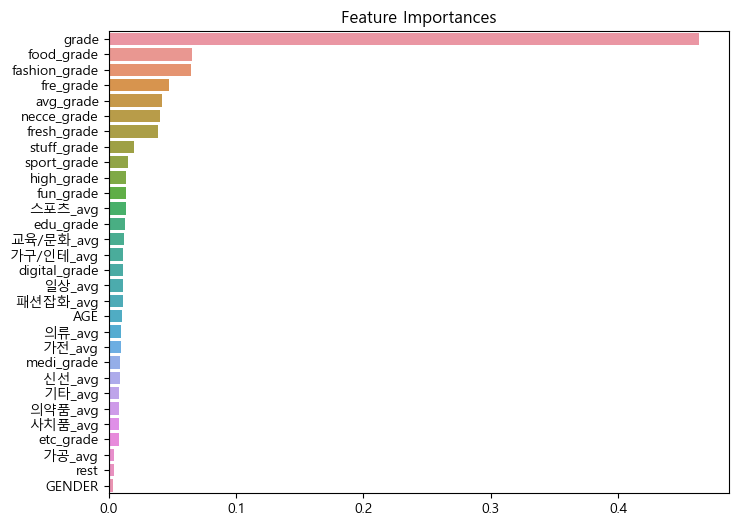

In [392]:
import seaborn as sns

ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,200,300], 'max_depth':[4,6,8,10,12], 'min_samples_leaf':[4,6,8,12,18], 'min_samples_split':[4,6,8,16,20]}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_rf = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_rf.fit(x_features,y_target)

print('최적 하이퍼 파라미터 : \n', grid_rf.best_params_)
print('최고 예측 정확도 : ', round(grid_rf.best_score_,4))

최적 하이퍼 파라미터 : 
 {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 200}
최고 예측 정확도 :  0.7146


In [125]:
all_12.columns

Index(['CUSTNO', 'avg_grade', '가공_avg', '가구/인테_avg', '일상_avg', '스포츠_avg',
       '패션잡화_avg', '교육/문화_avg', '기타_avg', '가전_avg', '의류_avg', '신선_avg',
       '의약품_avg', '사치품_avg', 'food_grade', 'fun_grade', 'etc_grade',
       'fresh_grade', 'fashion_grade', 'necce_grade', 'sport_grade',
       'stuff_grade', 'digital_grade', 'edu_grade', 'high_grade', 'medi_grade',
       'fre_grade', 'target_grade', 'GENDER', 'AGE', 'grade', 'rest'],
      dtype='object')

In [182]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#1-3분기 학습
# x_features = all_13_3.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# x_features = all_13_3.drop(['CUSTNO','target_grade','digital_grade','GENDER','GBTIME','의류_avg','의약품_avg','가공_avg'], axis=1, inplace=False)
# y_target = all_13_3['target_grade']

# #1-2분기 학습
# x_features = all_12.drop(['CUSTNO','target_grade', '교육/문화_avg', 'medi_grade', 'GENDER', '기타_avg','패션잡화_avg', 'edu_grade'], axis=1, inplace=False)
# y_target = all_12['target_grade']
# #1-3분기 학습
# x_features_3 = all_13_4.drop(['CUSTNO','target_grade', '교육/문화_avg', 'medi_grade', 'GENDER', '기타_avg','패션잡화_avg', 'edu_grade'], axis=1, inplace=False)
# target4_t = all_13_4['target_grade']
# # 전체 데이터 중, 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
# x_train, x_test, y_train, y_test = train_test_split(x_features_3, y_target, test_size = 0.3, random_state=156)

x_features = df.drop(['CUSTNO','target_grade','rest','패션잡화_avg','가공_avg','의약품_avg','신선_avg','기타_avg'], axis=1, inplace=False)
y_target = df['target_grade']

x_features2 = df2.drop(['CUSTNO','target_grade','rest','패션잡화_avg','가공_avg','의약품_avg','신선_avg','기타_avg'], axis=1, inplace=False)
y_target2 = df2['target_grade']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=156)

# x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_features_3, target4_t, test_size = 0.2, random_state=156)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=156)
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=400, n_jobs=-1, num_leaves=20, objective=None,
               random_state=216, reg_alpha=1e-07, reg_lambda=0.7, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#lightGBM도 XGBoost와 동일하게 조기 중단 수행 가능

evals = [(x_tr,y_tr),(x_val,y_val)]
lgbm_wrapper.fit(x_tr,y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals)
pred = lgbm_wrapper.predict(x_features)
pred_proba = lgbm_wrapper.predict_proba(x_features)[:,1]

get_clf_eval(y_target2, pred, pred_proba)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	training's binary_logloss: 0.398155	valid_1's binary_logloss: 0.407772
[2]	training's binary_logloss: 0.288815	valid_1's binary_logloss: 0.30279
[3]	training's binary_logloss: 0.236106	valid_1's binary_logloss: 0.254956
[4]	training's binary_logloss: 0.201293	valid_1's binary_logloss: 0.2241
[5]	training's binary_logloss: 0.189904	valid_1's binary_logloss: 0.21605
[6]	training's binary_logloss: 0.174781	valid_1's binary_logloss: 0.203299
[7]	training's binary_logloss: 0.1692	valid_1's binary_logloss: 0.199128
[8]	training's binary_logloss: 0.160399	valid_1's binary_logloss: 0.192555
[9]	training's binary_logloss: 0.154011	valid_1's binary_

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

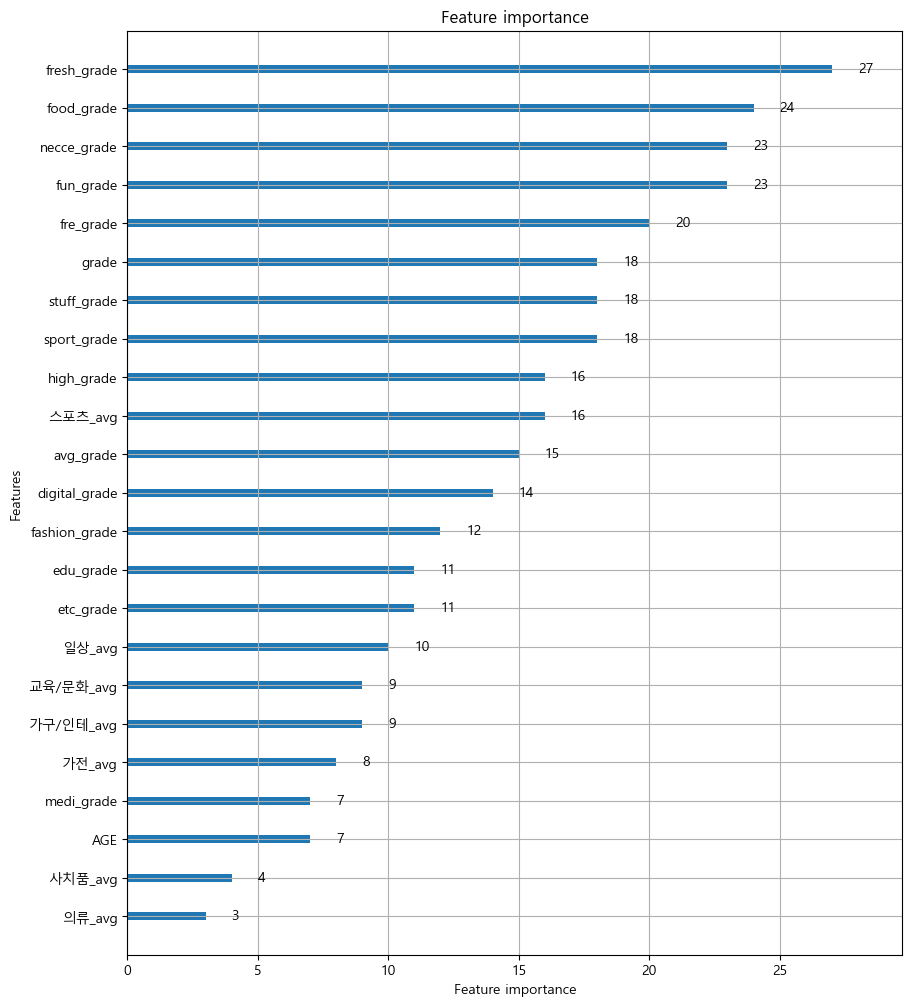

In [183]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax,max_num_features=40)

In [127]:
from xgboost import XGBClassifier
evals = [(x_features, y_target)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(x_features, y_target, early_stopping_rounds=400, eval_set=evals, eval_metric='logloss', verbose=True)
w_preds = xgb_wrapper.predict(x_features_3)
w_pred_proba = xgb_wrapper.predict_proba(x_features_3)[:,1]
xgb_wrapper

[0]	validation_0-logloss:0.67353
[1]	validation_0-logloss:0.65703
[2]	validation_0-logloss:0.64377
[3]	validation_0-logloss:0.63242
[4]	validation_0-logloss:0.62323
[5]	validation_0-logloss:0.61558
[6]	validation_0-logloss:0.60885
[7]	validation_0-logloss:0.60319
[8]	validation_0-logloss:0.59839
[9]	validation_0-logloss:0.59434
[10]	validation_0-logloss:0.59081
[11]	validation_0-logloss:0.58776
[12]	validation_0-logloss:0.58510
[13]	validation_0-logloss:0.58274
[14]	validation_0-logloss:0.58073
[15]	validation_0-logloss:0.57891
[16]	validation_0-logloss:0.57728
[17]	validation_0-logloss:0.57548
[18]	validation_0-logloss:0.57424
[19]	validation_0-logloss:0.57280
[20]	validation_0-logloss:0.57149
[21]	validation_0-logloss:0.57035
[22]	validation_0-logloss:0.56935
[23]	validation_0-logloss:0.56829
[24]	validation_0-logloss:0.56731
[25]	validation_0-logloss:0.56646
[26]	validation_0-logloss:0.56561
[27]	validation_0-logloss:0.56485
[28]	validation_0-logloss:0.56405
[29]	validation_0-loglos

[238]	validation_0-logloss:0.51445
[239]	validation_0-logloss:0.51435
[240]	validation_0-logloss:0.51426
[241]	validation_0-logloss:0.51413
[242]	validation_0-logloss:0.51398
[243]	validation_0-logloss:0.51382
[244]	validation_0-logloss:0.51373
[245]	validation_0-logloss:0.51360
[246]	validation_0-logloss:0.51346
[247]	validation_0-logloss:0.51337
[248]	validation_0-logloss:0.51328
[249]	validation_0-logloss:0.51320
[250]	validation_0-logloss:0.51308
[251]	validation_0-logloss:0.51297
[252]	validation_0-logloss:0.51286
[253]	validation_0-logloss:0.51272
[254]	validation_0-logloss:0.51263
[255]	validation_0-logloss:0.51252
[256]	validation_0-logloss:0.51243
[257]	validation_0-logloss:0.51232
[258]	validation_0-logloss:0.51224
[259]	validation_0-logloss:0.51215
[260]	validation_0-logloss:0.51206
[261]	validation_0-logloss:0.51195
[262]	validation_0-logloss:0.51183
[263]	validation_0-logloss:0.51175
[264]	validation_0-logloss:0.51165
[265]	validation_0-logloss:0.51154
[266]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [128]:
get_clf_eval(target4_t, w_preds, w_pred_proba)

오차 행렬
[[5290 4880]
 [2063 7112]]
정확도: 0.6411, 정밀도: 0.5931, 재현율: 0.7751,    F1: 0.6720, AUC:0.6995


In [269]:
df.columns

Index(['AGE', '가구/인테_avg', '일상_avg', '스포츠_avg', '패션잡화_avg', '교육/문화_avg',
       'avg_grade', 'food_grade', 'fun_grade', 'fresh_grade', 'fashion_grade',
       'necce_grade', 'sport_grade', 'stuff_grade', 'digital_grade',
       'edu_grade', 'high_grade', 'fre_grade', 'grade'],
      dtype='object')

In [279]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#1-3분기 학습
# x_features = all_13_3.drop(['CUSTNO','target_grade'], axis=1, inplace=False)
# x_features = all_13_3.drop(['CUSTNO','target_grade','digital_grade','GENDER','GBTIME','의류_avg','의약품_avg','가공_avg'], axis=1, inplace=False)
# y_target = all_13_3['target_grade']

# #1-2분기 학습
# x_features = all_12.drop(['CUSTNO','target_grade', '교육/문화_avg', 'medi_grade', 'GENDER', '기타_avg','패션잡화_avg', 'edu_grade'], axis=1, inplace=False)
# y_target = all_12['target_grade']
# #1-3분기 학습
# x_features_3 = all_13_4.drop(['CUSTNO','target_grade', '교육/문화_avg', 'medi_grade', 'GENDER', '기타_avg','패션잡화_avg', 'edu_grade'], axis=1, inplace=False)
# target4_t = all_13_4['target_grade']
# # 전체 데이터 중, 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
# x_train, x_test, y_train, y_test = train_test_split(x_features_3, y_target, test_size = 0.3, random_state=156)

x_features = df.drop(['CUSTNO','target_grade','기타_avg', '의약품_avg', '사치품_avg',
       'etc_grade', '가공_avg', 'rest', 'GENDER', '의류_avg',
       '가전_avg', 'medi_grade', '신선_avg'], axis=1, inplace=False)
y_target = df['target_grade']

x_features2 = df2.drop(['CUSTNO','target_grade','기타_avg', '의약품_avg', '사치품_avg',
       'etc_grade', '가공_avg', 'rest', 'GENDER', '의류_avg',
       '가전_avg', 'medi_grade', '신선_avg'], axis=1, inplace=False)
y_target2 = df2['target_grade']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=156)

# x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_features_3, target4_t, test_size = 0.2, random_state=156)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=156)
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=71, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=400, n_jobs=-1, num_leaves=20, objective=None,
               random_state=216, reg_alpha=1e-07, reg_lambda=0.7, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#lightGBM도 XGBoost와 동일하게 조기 중단 수행 가능

evals = [(x_tr,y_tr),(x_val,y_val)]
lgbm_wrapper.fit(x_tr,y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals)
pred = lgbm_wrapper.predict(x_features)
pred_proba = lgbm_wrapper.predict_proba(x_features)[:,1]

get_clf_eval(y_target2, pred, pred_proba)

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	training's binary_logloss: 0.491647	valid_1's binary_logloss: 0.4976
[2]	training's binary_logloss: 0.381052	valid_1's binary_logloss: 0.391445
[3]	training's binary_logloss: 0.311423	valid_1's binary_logloss: 0.32605
[4]	training's binary_logloss: 0.26652	valid_1's binary_logloss: 0.285784
[5]	training's binary_logloss: 0.235691	valid_1's binary_logloss: 0.256721
[6]	training's binary_logloss: 0.213016	valid_1's binary_logloss: 0.23769
[7]	training's binary_logloss: 0.203601	valid_1's binary_logloss: 0.229729
[8]	training's binary_logloss: 0.196049	valid_1's binary_logloss: 0.223358
[9]	training's binary_logloss: 0.191019	valid_1's binary

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

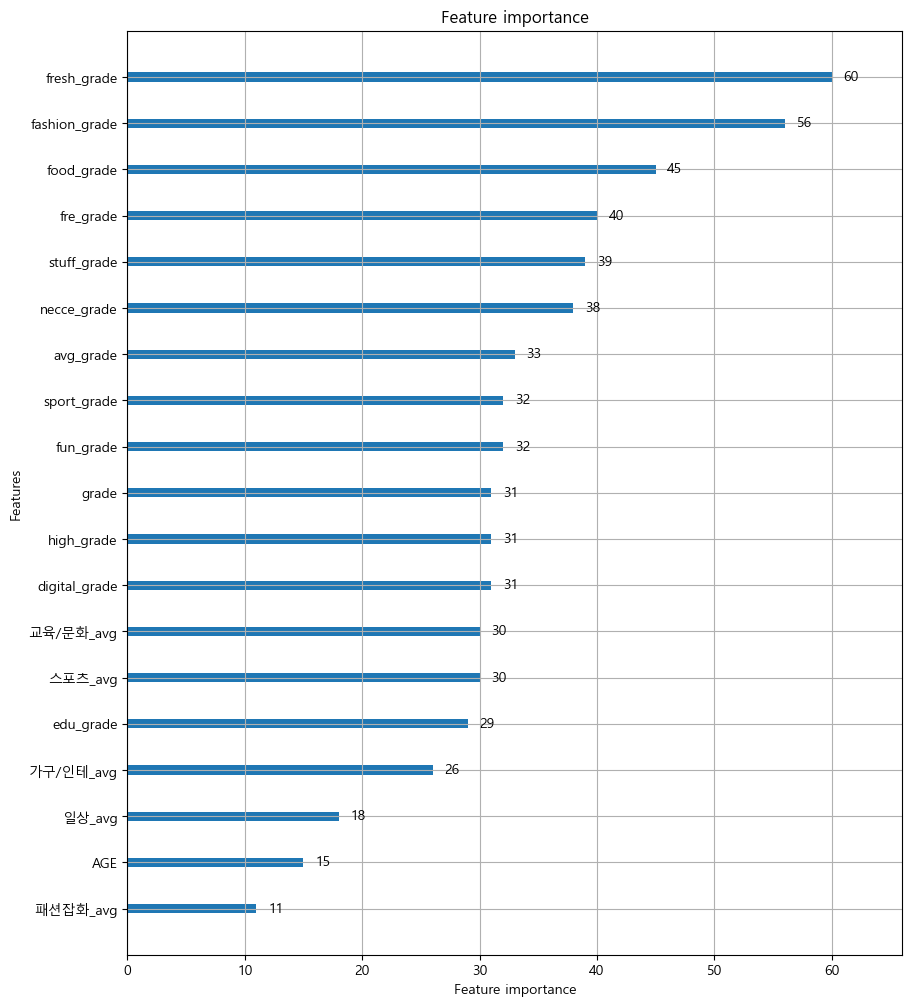

In [297]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Malgun Gothic')

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax,max_num_features=40)

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

x_features = df.drop(['CUSTNO','target_grade','기타_avg', '의약품_avg', '사치품_avg',
       'etc_grade', '가공_avg', 'rest', 'GENDER', '의류_avg',
       '가전_avg', 'medi_grade', '신선_avg'], axis=1, inplace=False)
y_target = df['target_grade']

x_features2 = df2.drop(['CUSTNO','target_grade','기타_avg', '의약품_avg', '사치품_avg',
       'etc_grade', '가공_avg', 'rest', 'GENDER', '의류_avg',
       '가전_avg', 'medi_grade', '신선_avg'], axis=1, inplace=False)
y_target2 = df2['target_grade']

x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = 0.3, random_state=156)

# rf_clf = RandomForestClassifier(random_state=0, n_estimators=400, max_depth=20
#                                 , min_samples_leaf=4,min_samples_split=6, n_jobs=-1)
rf_clf = RandomForestClassifier(random_state=0, n_estimators=300 ,n_jobs=-1)

rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_features)
pred_proba = rf_clf.predict_proba(x_features)[:,1]

get_clf_eval(y_target2, pred, pred_proba)

오차 행렬
[[7091 3078]
 [2015 7133]]
정확도: 0.7363, 정밀도: 0.6986, 재현율: 0.7797,    F1: 0.7369, AUC:0.7908


In [280]:
import joblib 

joblib.dump(lgbm_wrapper, 'model_L-members_lgbm.pkl')

['model_L-members_lgbm.pkl']

In [225]:
import pickle

mdl = joblib.load('model_L-members_rf.pkl')
mdl

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)

In [281]:
import pickle

mdl2 = joblib.load('model_L-members_lgbm.pkl')
mdl2

LGBMClassifier(bagging_fraction=1.0, bagging_freq=1, feature_fraction=0.7,
               learning_rate=0.3, min_child_samples=71, min_split_gain=0.1,
               n_estimators=400, num_leaves=20, random_state=216,
               reg_alpha=1e-07, reg_lambda=0.7)

In [317]:
import numpy as np

data = np.random.randint(1,6,19)

data

array([4, 4, 5, 4, 3, 2, 4, 5, 4, 1, 1, 2, 3, 1, 3, 3, 3, 5, 5])

In [318]:
data = list(data)
df = pd.DataFrame(columns=['AGE', '가구/인테_avg', '일상_avg', '스포츠_avg', '패션잡화_avg', '교육/문화_avg',
       'avg_grade', 'food_grade', 'fun_grade', 'fresh_grade', 'fashion_grade',
       'necce_grade', 'sport_grade', 'stuff_grade', 'digital_grade',
       'edu_grade', 'high_grade', 'fre_grade', 'grade'])
df.loc[0,:] = data
y_pred = mdl.predict(df)
y_pred

array([1.])

In [321]:
df2

,CUSTNO,GENDER,AGE,가공_avg,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,기타_avg,...,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,medi_grade,fre_grade,grade,rest,target_grade
0,1,0.00,6.00,4.00,8.00,7.00,5.00,3.00,0.00,3.00,...,3.00,3.00,6.00,4.00,5.00,0.00,6.00,3.00,2.00,0.00
1,2,0.00,6.00,4.00,7.00,7.00,9.00,1.00,0.00,0.00,...,3.00,3.00,6.00,0.00,5.00,0.00,3.00,6.00,2.00,0.00
2,3,0.00,6.00,1.00,0.00,2.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,4.00,0.00,0.00,2.00,1.00,3.00,0.00
3,4,1.00,6.00,4.00,4.00,4.00,6.00,1.00,0.00,0.00,...,2.00,2.00,0.00,1.00,0.00,5.00,2.00,2.00,3.00,0.00
4,5,0.00,6.00,4.00,4.00,7.00,3.00,2.00,0.00,0.00,...,1.00,2.00,2.00,0.00,1.00,0.00,2.00,2.00,2.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19312,19376,0.00,2.00,1.00,0.00,1.00,0.00,3.00,1.00,0.00,...,0.00,5.00,0.00,5.00,0.00,4.00,4.00,4.00,2.00,1.00
19313,19377,0.00,2.00,1.00,0.00,3.00,2.00,2.00,0.00,0.00,...,5.00,4.00,0.00,0.00,4.00,6.00,4.00,4.00,3.00,1.00
19314,19378,1.00,4.00,3.00,3.00,5.00,2.00,2.00,0.00,0.00,...,5.00,5.00,0.00,5.00,0.00,0.00,4.00,5.00,3.00,1.00
19315,19379,1.00,2.00,1.00,0.00,3.00,0.00,3.00,0.00,0.00,...,0.00,5.00,4.00,0.00,0.00,5.00,4.00,4.00,3.00,1.00


In [322]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



In [323]:
# 실루엣 계수 시각화 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 계수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [340]:
a = all_12[['CUSTNO','target_grade']]
df = all_13_4.drop('target_grade', axis=1)

df = pd.merge(df,a,on='CUSTNO',how='outer')
df
df.dropna(inplace=True)

In [341]:
a = all_13_4[['CUSTNO','target_grade']]
df2 = df.drop('target_grade', axis=1)

df2 = pd.merge(df2,a,on='CUSTNO',how='outer')
df2
df2.dropna(inplace=True)

In [344]:
df2=df2[df2['target_grade']==0]

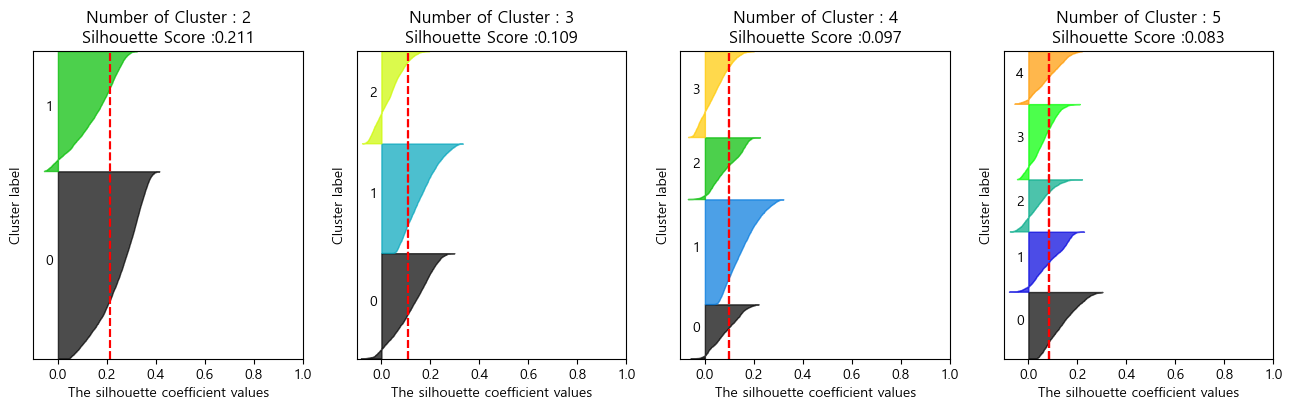

In [345]:
x_featrue = df2.drop(['CUSTNO','target_grade','기타_avg', '의약품_avg', '사치품_avg',
       'etc_grade', '가공_avg', 'rest', 'GENDER', '의류_avg',
       '가전_avg', 'medi_grade', '신선_avg'],axis=1,inplace=False)

visualize_silhouette([2,3,4,5], x_featrue)

In [346]:
df2 = df2.drop(['기타_avg', '의약품_avg', '사치품_avg',
       'etc_grade', '가공_avg', 'rest', 'GENDER', '의류_avg',
       '가전_avg', 'medi_grade', '신선_avg'],axis=1,inplace=False)

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=0).fit(x_featrue)
df2['cluster'] = kmeans.labels_
df2.head()

,CUSTNO,AGE,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,avg_grade,food_grade,fun_grade,...,necce_grade,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,fre_grade,grade,target_grade,cluster
0,1,6.00,8.00,7.00,5.00,3.00,0.00,3.00,3.00,6.00,...,3.00,3.00,3.00,6.00,4.00,5.00,6.00,3.00,0.00,0
1,2,6.00,7.00,7.00,9.00,1.00,0.00,6.00,3.00,3.00,...,6.00,3.00,3.00,6.00,0.00,5.00,3.00,6.00,0.00,0
2,3,6.00,0.00,2.00,0.00,0.00,1.00,1.00,1.00,0.00,...,4.00,0.00,0.00,1.00,4.00,0.00,2.00,1.00,0.00,1
3,4,6.00,4.00,4.00,6.00,1.00,0.00,2.00,5.00,5.00,...,5.00,2.00,2.00,0.00,1.00,0.00,2.00,2.00,0.00,2
4,5,6.00,4.00,7.00,3.00,2.00,0.00,5.00,3.00,2.00,...,2.00,1.00,2.00,2.00,0.00,1.00,2.00,2.00,0.00,1


In [351]:
len(df2)

10169

In [379]:
pd.set_option('display.max_columns', None)

In [359]:
df2.to_csv('군집화_DF.csv')

In [358]:
# df2[(df2['cluster']==0)&(df2['grade'] <= 3)&(df2['AGE']==1)]
print('0번군집 : ',len(df2[(df2['cluster']==0)]))
print('1번군집 : ',len(df2[(df2['cluster']==1)]))
print('2번군집 : ',len(df2[(df2['cluster']==2)]))

0번군집 :  3488
1번군집 :  3624
2번군집 :  3057


In [381]:
# 0번 군집
# 총 금액이 높고 빈도가 높은 고객은 675명/ 반대의 경우 2813명
# 구매력이 높은 고객은 1278명 약 36%
# 스포츠 용품에 많은 금액을 씀
# 취미 생활에 많은 투자를 함
df2[(df2['cluster']==0)&(df2['grade'] >3)]
df2[df2['cluster']==0].describe()

,CUSTNO,AGE,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,avg_grade,food_grade,fun_grade,fresh_grade,fashion_grade,necce_grade,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,fre_grade,grade,target_grade,cluster
count,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00,3488.00
mean,7531.65,4.23,5.02,5.64,5.51,3.24,2.73,2.90,3.59,3.82,3.30,3.82,3.92,3.89,3.87,3.26,2.78,3.21,3.28,3.76,0.00,0.00
std,5259.64,0.95,1.95,1.84,1.64,1.61,2.44,1.23,1.65,1.62,1.65,1.51,1.60,1.56,1.57,1.90,1.99,1.92,1.80,1.52,0.00,0.00
min,1.00,2.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
25%,3047.75,4.00,4.00,4.00,5.00,2.00,0.00,2.00,2.00,3.00,2.00,3.00,3.00,3.00,3.00,2.00,1.00,2.00,2.00,3.00,0.00,0.00
50%,6644.50,4.00,5.00,6.00,5.00,3.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,0.00,0.00
75%,11438.50,5.00,7.00,7.00,6.00,5.00,5.00,3.00,5.00,5.00,5.00,5.00,6.00,5.00,6.00,5.00,5.00,5.00,5.00,5.00,0.00,0.00
max,19314.00,6.00,8.00,8.00,9.00,8.00,7.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,0.00,0.00


In [382]:
# 1번 군집 
# 구매력이 높은 고객은 601명 가장 적다. 약16%
# 가공식품과 신선식품에 많은 소비가 있는 것을 볼 수 있다. 
# 교육에 특히 관심이 높다. 명품에 관심이 없다. 
# 생계형 고객이다.
df2[(df2['cluster']==1)&(df2['grade'] >3)]
df2[df2['cluster']==1].describe()

,CUSTNO,AGE,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,avg_grade,food_grade,fun_grade,fresh_grade,fashion_grade,necce_grade,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,fre_grade,grade,target_grade,cluster
count,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00,3624.00
mean,10882.76,4.07,0.68,3.04,1.36,1.39,1.57,1.56,2.82,1.61,2.90,2.32,2.46,1.68,2.27,0.93,2.58,0.37,2.44,2.02,0.00,1.00
std,5490.10,0.97,1.05,1.39,1.45,1.22,1.51,0.97,1.49,1.72,1.53,1.49,1.42,1.41,1.59,1.42,1.68,0.98,1.60,1.12,0.00,0.00
min,3.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
25%,6261.50,3.00,0.00,2.00,0.00,1.00,1.00,1.00,2.00,0.00,2.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00
50%,11639.50,4.00,0.00,3.00,1.00,1.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,1.00,2.00,0.00,2.00,0.00,2.00,2.00,0.00,1.00
75%,15567.50,5.00,1.00,4.00,2.00,2.00,2.00,2.00,4.00,2.00,4.00,4.00,4.00,2.00,4.00,2.00,4.00,0.00,3.00,2.00,0.00,1.00
max,19346.00,6.00,8.00,8.00,9.00,7.00,7.00,6.00,6.00,6.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,0.00,1.00


In [383]:
# 2번 군집
# 구매력이 높은 고객은 1794명 구매력이 높은 고객이 제일 많다. 약 58%
# 구매 추세가 상승고객인 사람들이 많다. 이러한 경향은 L-members를 자주 이용하고 많이 쓰지만 총구매는 1분기에 비해 떨어지는 고객임을 알 수 있다.
# 비싼 음식을 사는 편이다. 교육에 많은 돈을 쓴다.
# 

df2[(df2['cluster']==2)&(df2['grade'] >3)]
df2[df2['cluster']==2].describe()

,CUSTNO,AGE,가구/인테_avg,일상_avg,스포츠_avg,패션잡화_avg,교육/문화_avg,avg_grade,food_grade,fun_grade,fresh_grade,fashion_grade,necce_grade,sport_grade,stuff_grade,digital_grade,edu_grade,high_grade,fre_grade,grade,target_grade,cluster
count,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00,3057.00
mean,9868.47,4.00,1.30,3.09,2.81,1.87,2.46,2.30,4.14,2.82,4.12,3.41,3.68,2.96,3.50,1.29,3.58,1.04,3.43,3.73,0.00,2.00
std,5245.20,0.90,1.33,1.45,1.86,1.30,1.98,1.26,1.53,1.90,1.57,1.54,1.55,1.62,1.59,1.65,1.74,1.62,1.93,1.42,0.00,0.00
min,4.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,2.00
25%,5530.00,3.00,0.00,2.00,1.00,1.00,1.00,2.00,3.00,1.00,3.00,2.00,2.00,2.00,2.00,0.00,2.00,0.00,2.00,2.00,0.00,2.00
50%,9935.00,4.00,1.00,3.00,2.00,1.00,2.00,2.00,5.00,2.00,5.00,4.00,4.00,2.00,4.00,0.00,4.00,0.00,3.00,4.00,0.00,2.00
75%,14290.00,5.00,2.00,4.00,5.00,2.00,4.00,2.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.00,5.00,2.00,6.00,5.00,0.00,2.00
max,19335.00,6.00,8.00,8.00,9.00,8.00,7.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,0.00,2.00
